# Meta Methods

In [1]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
data = pd.read_csv('games_clean.csv')

In [4]:
column = data.columns.get_loc('Metacritic')
y = data.iloc[:,column]
X = data.loc[:, data.columns != 'Metacritic']

In [5]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)




In [6]:
data.loc[:, data.columns != 'Metacritic']

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,...,Web Publishing,Well-Written,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,333.0,512.0,2019.0,1.99,0.0,0.0,200.0,2.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,363.0,1000.0,2016.0,2.99,0.0,0.0,350.0,1.0,1.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,102.0,1024.0,2019.0,0.99,0.0,0.0,122.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,269.0,4000.0,2019.0,0.00,0.0,0.0,300.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,217.0,4000.0,2016.0,11.99,0.0,18.0,4000.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,161.0,512.0,2014.0,1.99,0.0,0.0,150.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2196,411.0,4000.0,2020.0,11.99,0.0,0.0,700.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2197,249.0,4000.0,2016.0,3.99,0.0,20.0,100.0,1.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2198,191.0,1000.0,2019.0,14.99,0.0,0.0,800.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


## Normalization
Data should be numerical and normalized or standarized

In [7]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X)
#X = scaler.transform(X)

## Voting scheme

In [8]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=20

clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))
    

Best Params fo Knn= {'n_neighbors': 21, 'weights': 'uniform'} Accuracy= 0.834090909090909
Accuracy: 0.804 [Naive Bayes]
Accuracy: 0.834 [Knn (3)]
Accuracy: 0.818 [Dec. Tree]


In [9]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))


Accuracy: 0.837 [Majority Voting]


In [10]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.835 [Weighted Voting]


## Bagging

In [11]:
from sklearn.ensemble import BaggingClassifier

lb=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2=[]    
print()
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

Accuracy: 0.805 [1]
Accuracy: 0.824 [2]
Accuracy: 0.855 [5]
Accuracy: 0.865 [10]
Accuracy: 0.876 [20]
Accuracy: 0.880 [50]
Accuracy: 0.876 [100]

Accuracy: 0.734 [1]
Accuracy: 0.799 [2]
Accuracy: 0.824 [5]
Accuracy: 0.843 [10]
Accuracy: 0.846 [20]
Accuracy: 0.844 [50]
Accuracy: 0.842 [100]


## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest,n_jobs=-1), X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.765 [1]
Accuracy: 0.801 [2]
Accuracy: 0.833 [5]
Accuracy: 0.851 [10]
Accuracy: 0.857 [20]
Accuracy: 0.856 [50]
Accuracy: 0.863 [100]


In [13]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest,n_jobs=-1), X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.755 [1]
Accuracy: 0.805 [2]
Accuracy: 0.827 [5]
Accuracy: 0.839 [10]
Accuracy: 0.845 [20]
Accuracy: 0.847 [50]
Accuracy: 0.850 [100]


## Boosting

In [14]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.846 [1]
Accuracy: 0.846 [2]
Accuracy: 0.845 [5]
Accuracy: 0.842 [10]
Accuracy: 0.840 [20]
Accuracy: 0.824 [50]
Accuracy: 0.737 [100]


In [15]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.838 [1]
Accuracy: 0.828 [2]
Accuracy: 0.788 [5]
Accuracy: 0.805 [10]
Accuracy: 0.810 [20]
Accuracy: 0.818 [50]
Accuracy: 0.834 [100]


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.830 [1]
Accuracy: 0.829 [2]
Accuracy: 0.839 [5]
Accuracy: 0.843 [10]
Accuracy: 0.842 [20]
Accuracy: 0.848 [50]
Accuracy: 0.849 [100]


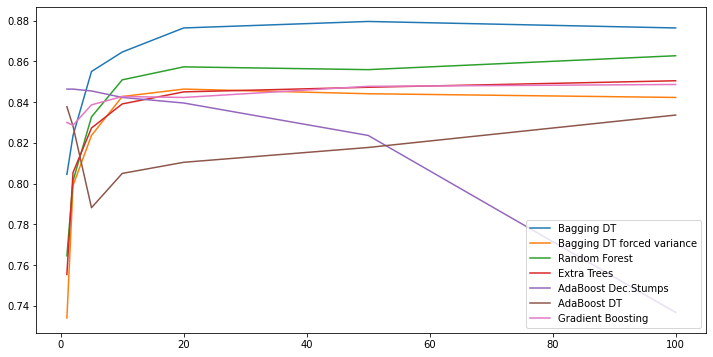

In [17]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

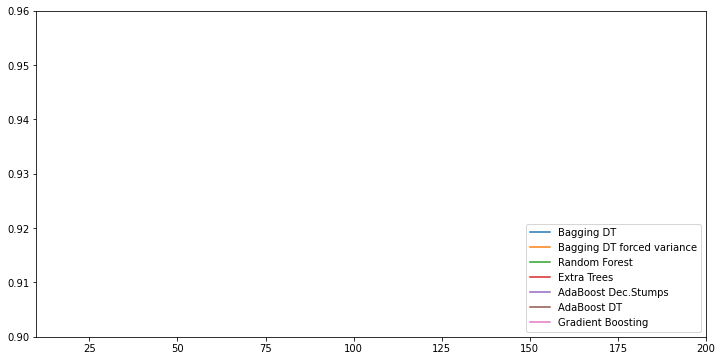

In [18]:
plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')
plt.xlim(10,200)
plt.ylim(0.90,0.96)
plt.show()

## Feature Selection with Forests of trees

In [19]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)  


[6.41018147e-02 3.66982674e-02 6.14613269e-02 3.84818974e-02
 1.28353166e-03 3.36719636e-02 4.45811723e-02 4.17255794e-02
 3.11023529e-02 4.13129828e-02 2.85657436e-02 3.18804289e-02
 1.27626650e-02 1.69869367e-03 5.03133122e-04 7.84161642e-04
 2.84026268e-03 5.58770422e-03 1.44423870e-03 2.98618102e-04
 0.00000000e+00 6.38618437e-04 7.75756598e-04 1.95255537e-03
 4.41236966e-05 1.92675454e-03 7.04183220e-04 3.78572247e-05
 0.00000000e+00 5.75195303e-04 8.95565569e-03 1.85466583e-03
 0.00000000e+00 5.56791516e-04 1.66810637e-03 7.90677576e-04
 1.03605162e-02 6.00303660e-04 1.72932271e-03 3.97350474e-04
 0.00000000e+00 2.59207742e-04 1.60528569e-05 2.99750186e-03
 1.91540553e-03 3.18798945e-03 1.24562869e-04 1.38046925e-03
 3.11619581e-05 9.53636568e-04 8.32184613e-06 5.06998917e-04
 5.08886206e-03 5.47549853e-04 2.34731023e-05 7.61258358e-05
 3.02712976e-04 5.37850732e-05 1.96636263e-04 3.52350041e-05
 1.00747605e-03 1.07784043e-05 0.00000000e+00 7.21755658e-05
 9.48686660e-04 1.295171

In [20]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True, threshold=0.05)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X=X, y=y, cv=cv, scoring='accuracy')))
print(np.mean(cross_val_score(KNeighborsClassifier(), X=X_new, y=y, cv=cv, scoring='accuracy')))

(2200, 2)
0.8163636363636364
0.8109090909090909


In [ ]:
thresholds=clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cv, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

In [ ]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)
print(X_new.shape)

print('Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X=X, y=y, cv=cv, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=cv, scoring='accuracy')))